In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies_df = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [ ]:
movies_df.head()

## Dropping extraneous features from the movies_df

In [ ]:
movies_df.columns

In [ ]:
movies_clean = movies_df[[ 'id','vote_average','vote_count','popularity','original_title']]
movies_clean.head()

## Calculating weighted rating of movies using IMDB System
Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page
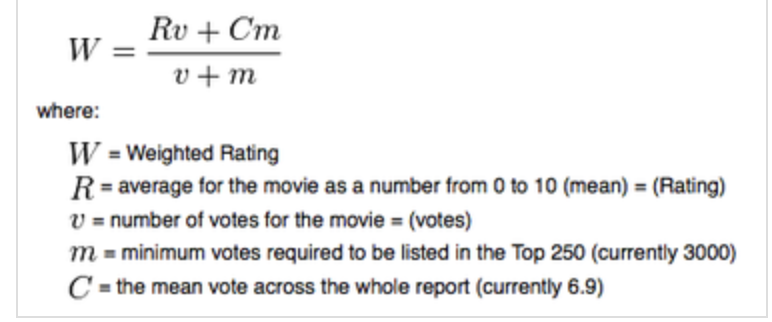

In [ ]:
R = movies_clean['vote_average']
v = movies_clean['vote_count']
m = movies_clean['vote_count'].quantile(0.7) ## setting threshold by selecting top 30% movies for this metric
C =  movies_clean['vote_average'].mean()

In [ ]:
movies_clean['weighted_rating'] = ((R*v)+(C*m)) / (v+m)

In [ ]:
movies_clean

## Plotting values by Weighted Rating

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=movies_clean.sort_values('weighted_rating',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_rating'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold');

## Plotting values by Weighted Rating

In [ ]:
weight_average_popularity=movies_clean.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average_popularity['popularity'].head(10), y=weight_average_popularity['original_title'].head(10), data=weight_average_popularity);
plt.title('Best Movies by Popularity score', weight='bold')
plt.xlabel('Popularity Score', weight='bold')
plt.ylabel('Movie Title', weight='bold');

## Computing Hybrid score
H_SCORE = weighted_rating x 0.5 + popularity x 0.5

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scaled_scores = pd.DataFrame(scalar.fit_transform(movies_clean[['popularity','weighted_rating']]), 
                             columns=['popularity_scaled','weighted_rating_scaled'])
movies_scaled = movies_clean.copy()
movies_scaled[['popularity_scaled','weighted_rating_scaled']] = scaled_scores
movies_scaled

In [ ]:
movies_scaled['score'] = (0.5 * movies_scaled['weighted_rating_scaled']) + \
                            (0.5 * movies_scaled['popularity_scaled'])

## Plotting values by Hybrid score

In [ ]:
weight_average_score_hybrid=movies_scaled.sort_values('score',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average_score_hybrid['score'].head(20), y=weight_average_score_hybrid['original_title'].head(20), data=weight_average_score_hybrid);
plt.title('Best Movies by Hybrid score', weight='bold')
plt.xlabel('Hybrid Score', weight='bold')
plt.ylabel('Movie Title', weight='bold');

## References:
https://github.com/krishnaik06/Recommendation_complete_tutorial